=== A1: Streamflow Classification ===
Train Confusion Matrix:
 [[2813  367]
 [   2 3150]]
Train Precision: 0.8956, Recall: 0.9994, F1 Score: 0.9447
Test Confusion Matrix:
 [[1217  146]
 [   5 1346]]
Test Precision: 0.9021, Recall: 0.9963, F1 Score: 0.9469
Model Observation: Fit appears to be generalizing well.

=== A2: Streamflow Regression ===
MSE: 1.1731
RMSE: 1.0831
MAPE: 40.66%
R² Score: 0.9732


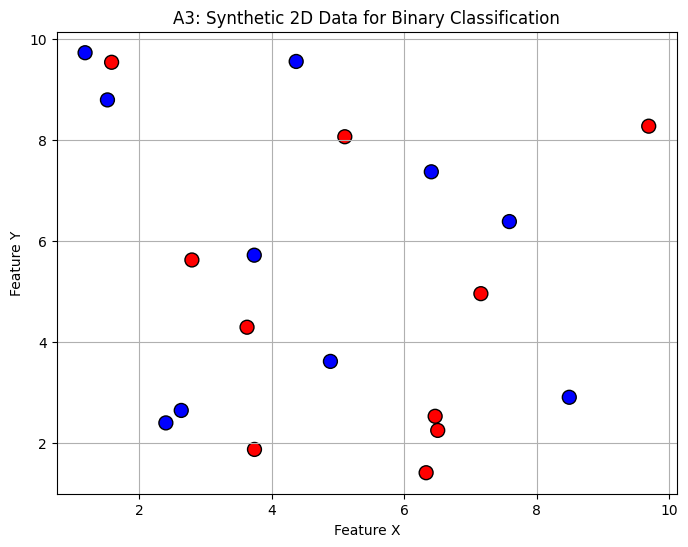

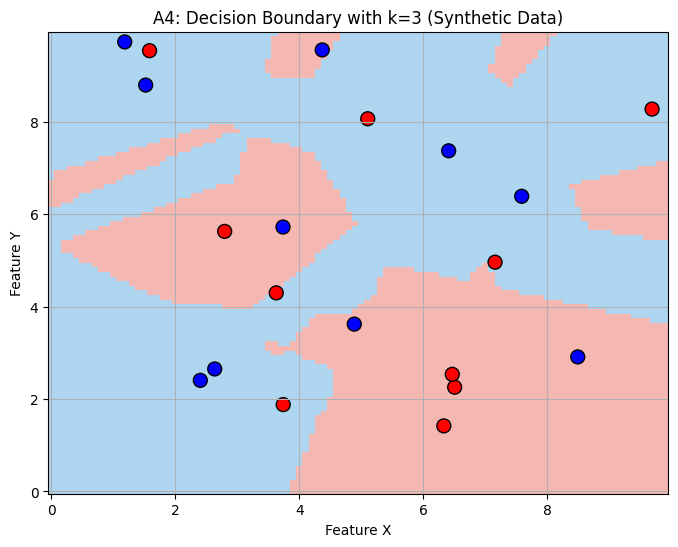

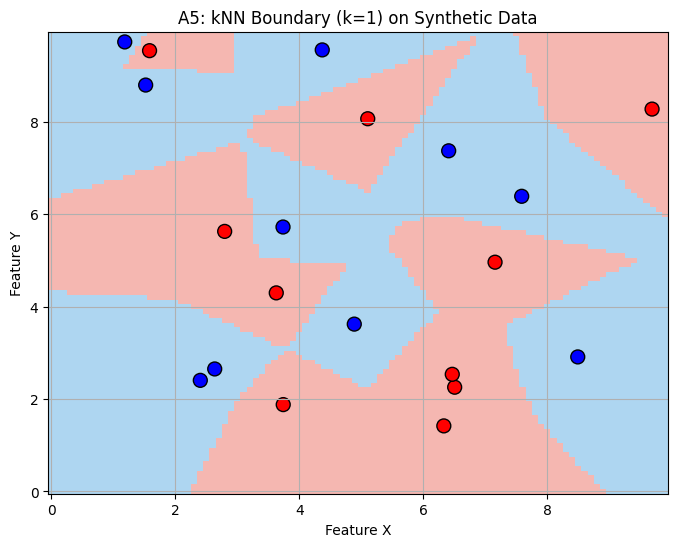

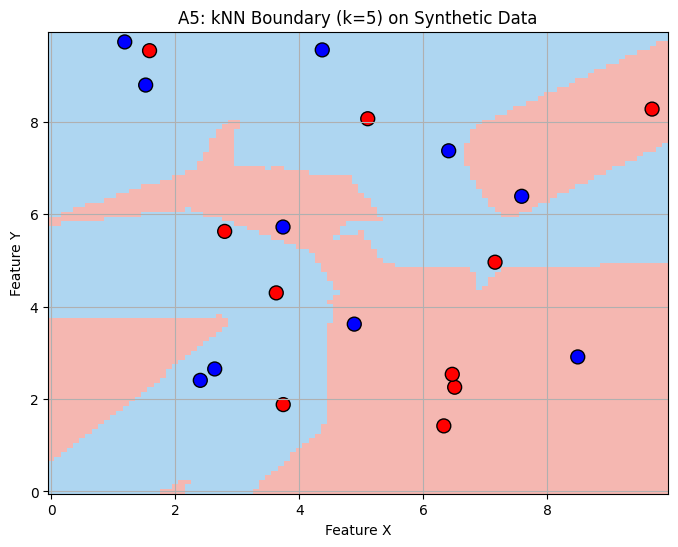

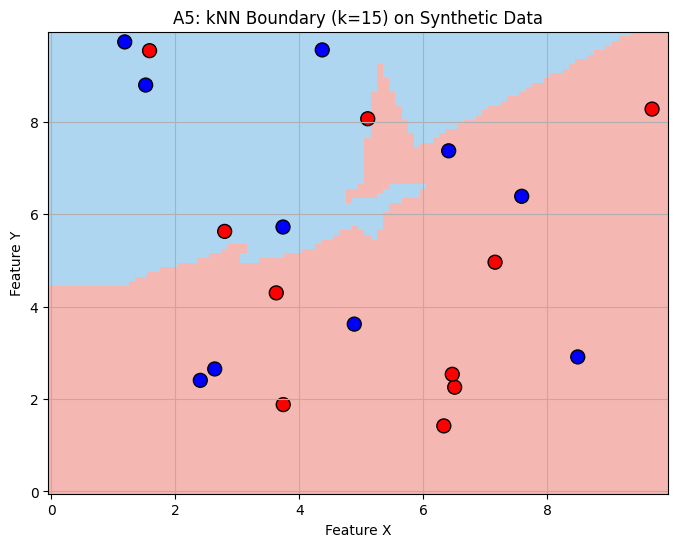

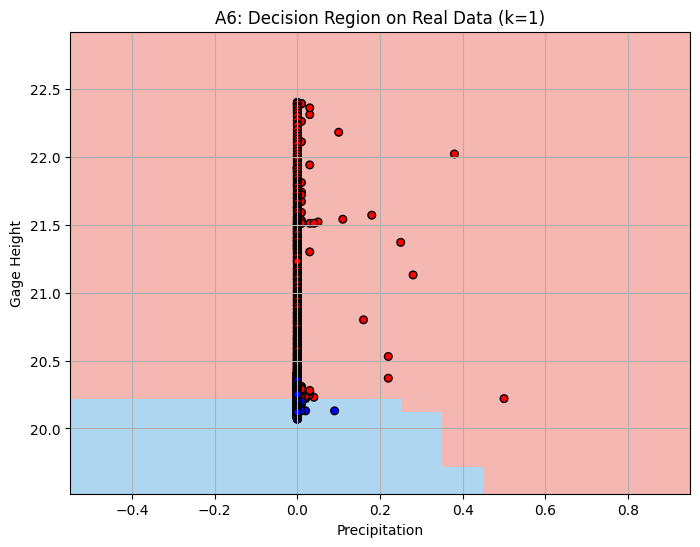

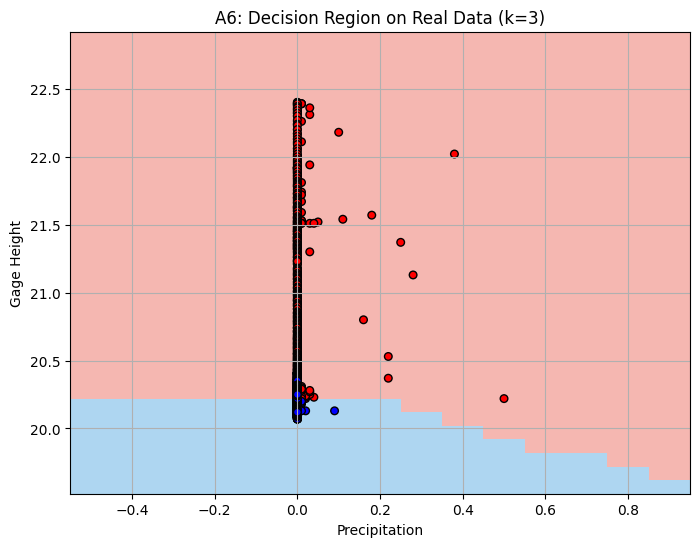

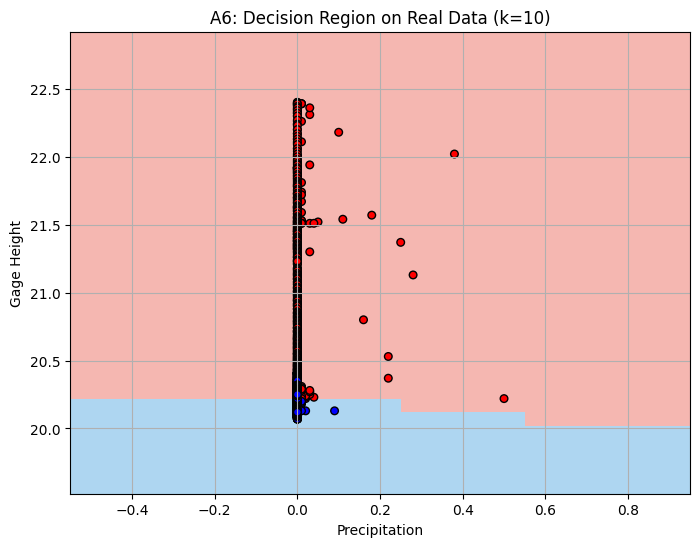

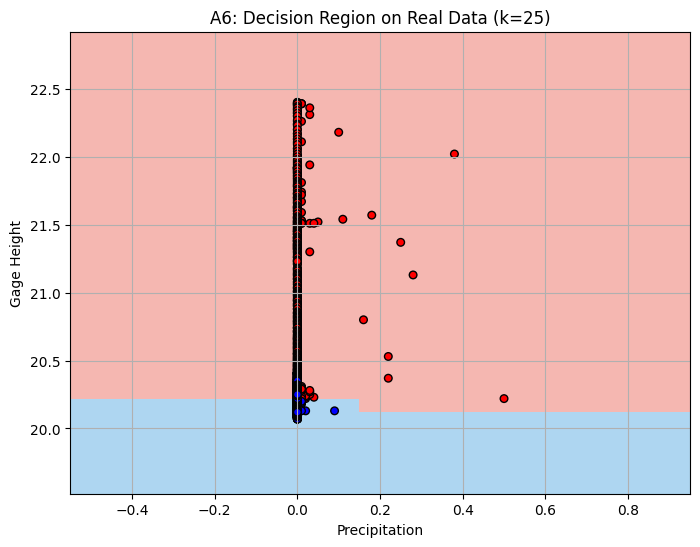

=== A7: Best k = 3
Cross-validated Accuracy: 0.9420


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ==========================
# A1: Streamflow Classification using KNN
# ==========================

# Binary target based on streamflow median
threshold = df['stream_flow'].median()
df['streamflow_class'] = (df['stream_flow'] > threshold).astype(int)

# Features for classification
features_classification = df[['precipitation', 'gage_height']].values
labels_classification = df['streamflow_class'].values

# Train-test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    features_classification, labels_classification, test_size=0.3, random_state=42, stratify=labels_classification
)

# Train KNN (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_cls, y_train_cls)
pred_train_cls = knn_model.predict(X_train_cls)
pred_test_cls = knn_model.predict(X_test_cls)

# Evaluation function
def evaluate_classifier(y_actual, y_predicted):
    cm = confusion_matrix(y_actual, y_predicted)
    precision = precision_score(y_actual, y_predicted)
    recall = recall_score(y_actual, y_predicted)
    f1 = f1_score(y_actual, y_predicted)
    return cm, precision, recall, f1

# Metrics
cm_train, prec_train, rec_train, f1_train = evaluate_classifier(y_train_cls, pred_train_cls)
cm_test, prec_test, rec_test, f1_test = evaluate_classifier(y_test_cls, pred_test_cls)

print("=== A1: Streamflow Classification ===")
print("Train Confusion Matrix:\n", cm_train)
print(f"Train Precision: {prec_train:.4f}, Recall: {rec_train:.4f}, F1 Score: {f1_train:.4f}")
print("Test Confusion Matrix:\n", cm_test)
print(f"Test Precision: {prec_test:.4f}, Recall: {rec_test:.4f}, F1 Score: {f1_test:.4f}")

if f1_train > 0.95 and f1_test < 0.80:
    print("Model Observation: Overfitting suspected.")
elif f1_train < 0.70:
    print("Model Observation: Underfitting likely.")
else:
    print("Model Observation: Fit appears to be generalizing well.")

# ==========================
# A2: Regression on Streamflow
# ==========================

X_regression = df[['precipitation', 'gage_height', 'reservoir_storage']].values
y_regression = df['stream_flow'].values

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.3, random_state=42
)

regressor = LinearRegression()
regressor.fit(X_train_reg, y_train_reg)
pred_reg = regressor.predict(X_test_reg)

# MAPE calculation
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

mse = mean_squared_error(y_test_reg, pred_reg)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_reg, pred_reg)
r2 = r2_score(y_test_reg, pred_reg)

print("\n=== A2: Streamflow Regression ===")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

# ==========================
# A3: Synthetic Dataset Plot
# ==========================

np.random.seed(42)
synthetic_features = np.random.uniform(1, 10, (20, 2))
synthetic_labels = np.array([0]*10 + [1]*10)

plt.figure(figsize=(8, 6))
plt.scatter(synthetic_features[:, 0], synthetic_features[:, 1], c=synthetic_labels,
            cmap=ListedColormap(['blue', 'red']), edgecolor='k', s=100)
plt.title("A3: Synthetic 2D Data for Binary Classification")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.grid(True)
plt.show()

# ==========================
# A4: Decision Boundary (k=3)
# ==========================

knn_syn = KNeighborsClassifier(n_neighbors=3)
knn_syn.fit(synthetic_features, synthetic_labels)

xx, yy = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))
grid_data = np.c_[xx.ravel(), yy.ravel()]
Z = knn_syn.predict(grid_data).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#AED6F1', '#F5B7B1']), shading='auto')
plt.scatter(synthetic_features[:, 0], synthetic_features[:, 1], c=synthetic_labels,
            cmap=ListedColormap(['blue', 'red']), edgecolor='k', s=100)
plt.title("A4: Decision Boundary with k=3 (Synthetic Data)")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.grid(True)
plt.show()

# ==========================
# A5: Compare k=1, 5, 15 on Synthetic Data
# ==========================

for k_val in [1, 5, 15]:
    model = KNeighborsClassifier(n_neighbors=k_val)
    model.fit(synthetic_features, synthetic_labels)
    Z = model.predict(grid_data).reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#AED6F1', '#F5B7B1']), shading='auto')
    plt.scatter(synthetic_features[:, 0], synthetic_features[:, 1], c=synthetic_labels,
                cmap=ListedColormap(['blue', 'red']), edgecolor='k', s=100)
    plt.title(f"A5: kNN Boundary (k={k_val}) on Synthetic Data")
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.grid(True)
    plt.show()

# ==========================
# A6: kNN Decision Region on Project Data
# ==========================

real_X = df[['precipitation', 'gage_height']].values
real_y = df['streamflow_class'].values

x_min, x_max = real_X[:, 0].min() - 0.5, real_X[:, 0].max() + 0.5
y_min, y_max = real_X[:, 1].min() - 0.5, real_X[:, 1].max() + 0.5
xx_real, yy_real = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))
grid_real = np.c_[xx_real.ravel(), yy_real.ravel()]

for k_project in [1, 3, 10, 25]:
    model = KNeighborsClassifier(n_neighbors=k_project)
    model.fit(real_X, real_y)
    Z_real = model.predict(grid_real).reshape(xx_real.shape)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx_real, yy_real, Z_real, cmap=ListedColormap(['#AED6F1', '#F5B7B1']), shading='auto')
    plt.scatter(real_X[:, 0], real_X[:, 1], c=real_y,
                cmap=ListedColormap(['blue', 'red']), edgecolor='k', s=30)
    plt.title(f"A6: Decision Region on Real Data (k={k_project})")
    plt.xlabel("Precipitation")
    plt.ylabel("Gage Height")
    plt.grid(True)
    plt.show()

# ==========================
# A7: Hyperparameter Tuning
# ==========================

search_grid = {'n_neighbors': np.arange(1, 32, 2)}
grid_cv = GridSearchCV(KNeighborsClassifier(), param_grid=search_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_cv.fit(features_classification, labels_classification)

optimal_k = grid_cv.best_params_['n_neighbors']
optimal_score = grid_cv.best_score_

print(f"=== A7: Best k = {optimal_k}")
print(f"Cross-validated Accuracy: {optimal_score:.4f}")
